In [1]:
from os import listdir
import pickle
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from matplotlib import pyplot as plt

def pickle_read(path):
    with open(path, 'rb') as f:
        
        data = pickle.load(f)
        return data


graph1
graph11
graph12
graph13
graph14
graph15
graph16
graph17
graph19
graph2
graph20
graph21
graph22
graph23
graph3
graph4
graph5
graph6
graph7
graph8
graph9
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
(1, 40, 100)
0
42227


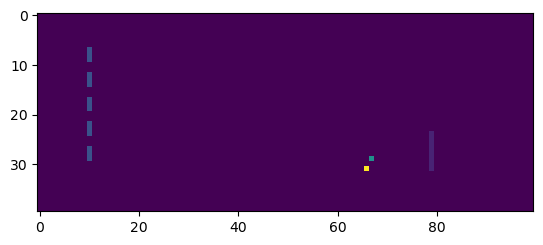

In [2]:
graph = listdir("graph")

graph_data = []
graph_label = []

for dir_path in graph:
    
    #if (int(dir_path[len(dir_path) - 1]) > 9 or len(dir_path) >= 7): continue
    print(dir_path)
    for data_path in listdir("graph" + '/' + dir_path):
        datas = pickle_read("graph" + '/' + dir_path + '/' + data_path)

        for data in datas:
            graph_data.append(np.array([data[0]]))
            graph_label.append(data[1])


for i in range(10):

    print(graph_data[i].shape)
    print(graph_label[i])
print(len(graph_data))
plt.imshow(graph_data[i][0])


In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

batch = 64
# 转换为PyTorch张量
graph_data_tensor = torch.tensor(np.array(graph_data), dtype=torch.double)
graph_label_tensor = torch.tensor(np.array(graph_label), dtype=torch.long)

# 创建TensorDataset和DataLoader
dataset = TensorDataset(graph_data_tensor, graph_label_tensor)
data_loader = DataLoader(dataset, batch_size=batch, shuffle=True)

for x, y in data_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 40, 100])
torch.Size([64])


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3, padding=1, stride=2),
                                  nn.ReLU(),
                                  nn.Conv2d(16, 64, kernel_size=3, padding=1, stride=2),
                                  nn.ReLU())

        fc_sample = torch.zeros((1, 40, 100))
        self.fc_input = len(torch.flatten(self.conv(fc_sample)))

        self.fc = nn.Sequential(nn.Linear(self.fc_input, 1024),
                                nn.ReLU(),
                                nn.Linear(1024, 3))
        
        
    def forward(self, x):
        x = self.conv(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x
    



In [5]:
import torch.optim as optim

use_gpu = torch.cuda.is_available()

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
min_loss = 1e9
if (use_gpu):
    model = model.to(device="cuda", dtype=torch.double)
    criterion = criterion.to(device="cuda", dtype=torch.double)

model

SimpleCNN(
  (conv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=16000, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=3, bias=True)
  )
)

In [6]:

        
        

for epoch in range(1000):  # 进行10个训练周期
    running_loss = 0.0
    correct = 0
    total = 0

    
    batch_count = 0
    for inputs, labels in data_loader:
        #print(f"batch:{batch_count}")
        if (use_gpu):
            inputs, labels = inputs.to(device="cuda", dtype=torch.double), labels.to(device="cuda", dtype=torch.long)
        
        optimizer.zero_grad()  # 清空梯度
        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        total += labels.size(0)  # 更新总样本数
        correct += (predicted == labels).sum().item()  # 更新正确预测的样本数
        
        # for i in range(len(predicted)):
        #     if (predicted[i] != labels[i]):
        #         print(f"No:{i}, predict:{predicted[i]}, label:{int(labels[i])}", end=" ")
        batch_count += 1
        
    epoch_loss = running_loss / len(data_loader)
    epoch_acc = 100 * correct / total  # 计算准确率
    print()
    if (epoch_loss < min_loss):
        
        torch.save(model.state_dict() ,"checkpoint_cls.pth" )
        print(f"save model, old_min_loss:{min_loss}, new_min_loss:{epoch_loss}")
        min_loss = epoch_loss

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


save model, old_min_loss:1000000000.0, new_min_loss:0.5472528489547789
Epoch 1, Loss: 0.5473, Accuracy: 75.02%

save model, old_min_loss:0.5472528489547789, new_min_loss:0.3811762953056151
Epoch 2, Loss: 0.3812, Accuracy: 83.79%

save model, old_min_loss:0.3811762953056151, new_min_loss:0.2776208782075695
Epoch 3, Loss: 0.2776, Accuracy: 88.65%

save model, old_min_loss:0.2776208782075695, new_min_loss:0.1907976276216766
Epoch 4, Loss: 0.1908, Accuracy: 92.60%

save model, old_min_loss:0.1907976276216766, new_min_loss:0.12629930101360642
Epoch 5, Loss: 0.1263, Accuracy: 95.25%

save model, old_min_loss:0.12629930101360642, new_min_loss:0.08030764628832082
Epoch 6, Loss: 0.0803, Accuracy: 97.22%

save model, old_min_loss:0.08030764628832082, new_min_loss:0.055576869722552345
Epoch 7, Loss: 0.0556, Accuracy: 98.24%

save model, old_min_loss:0.055576869722552345, new_min_loss:0.03776524469085385
Epoch 8, Loss: 0.0378, Accuracy: 98.85%

save model, old_min_loss:0.03776524469085385, new_mi

KeyboardInterrupt: 